<a href="https://colab.research.google.com/github/aiswarya-sureshkumar/Graduate-Admission-Prediction-using-FNN/blob/main/Graduate%20Admission%20Prediction%20using%20FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [28]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [30]:
df.shape

(500, 9)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [32]:
df.duplicated().sum()

0

In [33]:
df.drop(columns=['Serial No.'],inplace=True)

In [34]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [35]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [36]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [37]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [40]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [103]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

In [104]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 7)                 56        
                                                                 
 dense_23 (Dense)            (None, 16)                128       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [106]:
history=model.fit(x_train_scaled,y_train,batch_size=16,epochs=100,validation_split=0.20)

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.1351 - val_loss: 0.0445
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0295 - val_loss: 0.0327
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.0259
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0182 - val_loss: 0.0217
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0189
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.0162
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.0142
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.0123
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0114
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 11

In [107]:
y_pred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [108]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8253369342547593

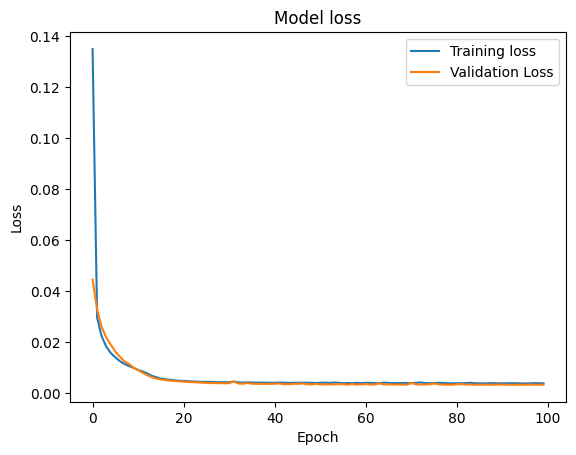

In [109]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss','Validation Loss'])
plt.show()